## Local Average Treatment Effect - LATE

Prof. Daniel de Abreu Pereira Uhr


### Estrutura da aula

* Lembrando do IV Tradicional e o viés de variável omitida
* Considerações gerais sobre o IV tradicional
* Local Average Treatment Effect (LATE)
* Formalizando o Local Average Treatment Effect (LATE)
* Aplicação no Python
* Considerações 

### Referências

* Cunningham, S. W. (2013). Causal inference: The mixtape. https://www.scunning.com/mixtape.html
* Facure, Matheus. Causal Inference for The Brave and True. https://matheusfacure.github.io/python-causality-handbook/landing-page.html 
* Joshua D. Angrist and Jörn-Steffen Pischke (2009). Mostly Harmless Econometrics: An Empiricist's Companion. Princeton University Press.
* Imbens, G. W., & Rubin, D. B. (2015). Causal inference in statistics, social, and biomedical sciences. Cambridge University Press.
* Itau Social (2018). Avaliação Econômica de Projetos Sociais. https://www.itausocial.org.br/wp-content/uploads/2018/05/avaliacao-economica-3a-ed_1513188151.pdf 

#### Lembrando do IV Tradicional e o Viés de Variável Omitida

Vimos que uma maneira de controlar o Viés de Variável Omitida é adicionar essa própria variável omitida ao modelo. No entanto, isso nem sempre é possível, principalmente porque simplesmente não temos dados sobre eventuais variáveis ​​omitidas. Por exemplo, considere o modelo de efeito da educação sobre os salários:

$$ ln(Salários)_{i} = \beta+{0} + \theta educ_{i} + \phi Habilidade_{i} + \epsilon_{i} $$

Para descobrir o efeito causal da educação $\theta$ sobre o $ln(salários)$ precisamos controlar os fatores de habilidade. Se não o fizermos, provavelmente teríamos algum viés, afinal, a capacidade é provavelmente um fator de confusão (confunding), causando tanto o tratamento, a educação, quanto o resultado, os ganhos salariais.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from matplotlib import style
import graphviz as gr
%matplotlib inline

pd.set_option("display.max_columns", 5)
style.use("fivethirtyeight")

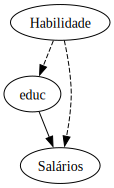

In [2]:
g = gr.Digraph()

g.edge("Habilidade", "educ", style="dashed")
g.edge("Habilidade", "Salários", style="dashed")
g.edge("educ", "Salários")
g

Uma forma de evitar isto é controlar níveis constantes de capacidade ao medir o efeito da educação sobre os salários. Poderíamos fazer isso incluindo a habilidade em nosso modelo de regressão linear. No entanto, não temos boas medidas de capacidade. O melhor que temos são algumas *proxies* muito questionáveis, como o QI.

É aqui que as Variáveis ​​Instrumentais entram em cena. **A ideia da VI é encontrar outra variável que cause o tratamento e só esteja correlacionada com o resultado ao longo do tratamento**. Outra forma de dizer isto é que este instrumento $Z_{i}$ não está correlacionado com $Y_{0}$, mas está correlacionado com $T$ (**restrição de exclusão**).

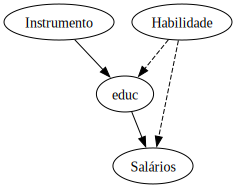

In [3]:
g = gr.Digraph()

g.edge("Habilidade", "educ", style="dashed")
g.edge("Habilidade", "Salários", style="dashed")
g.edge("educ", "Salários")
g.edge("Instrumento", "educ")
g

Se temos um instrumento, podemos recuperar o efeito causal $\theta$ com o método IV. Para fazer isso, vamos pensar na equação ideal que queremos executar. Usando termos mais gerais como $T$ para o tratamento e $W$ para os confundidores, aqui está o que queremos:

$$ Y_{i} = \beta_{0} + \theta_{1}T_{i} + \phi W_{i} + u_{i} $$

Como não temos dados para $W$, então o que podemos fazer é:

$$ Y_{i} = \beta_{0} + \theta_{1}T_{i} + v_{i} $$

$$ v_{i} = \phi W_{i} + u_{i} $$

Como $W$ é um confundidor, $Cov(T,v) \neq 0$. Isso significaria que a habilidade está correlacionada com a educação. Se for este o caso, executar a regressão com variável relevante omitida produziria um estimador tendencioso para $\theta_{1}$ devido a variáveis ​​omitidas (**Viés de variável omitida**).

É aqui que entra a técnica de variável instrumental. Como o instrumento $Z$ só está correlacionado com o resultado através de $T$, isso implica que $Cov(Z,v) = 0$, caso contrário, haveria um segundo caminho de $Z$ para $Y$ através de $W$. Com isso em mente, podemos escrever:

$$ Cov(Z,Y) = Cov(Z,\beta_{0} + \theta_{1}T + v_{i}) = \theta . Cov(Z,T) + Cov(Z,v) = \theta Cov(Z,T) $$

Dividindo cada lado por $V(Z_{i})$, e reorganizando, obtemos:

$$ \theta = \frac{Cov(Z,Y)/V(Z_{i})}{Cov(Z,T)/V(Z_{i})} = \frac{\text{Forma Reduzida}}{\text{Primeiro Estágio}} $$


Tanto o **numerador quanto o denominador são coeficientes de regressão** (covariâncias divididas por variâncias). **O numerador é o resultado da regressão de $Y$ sobre $Z$**. Em outras palavras, é o “impacto” de $Z$ sobre $Y$. Lembre-se de que isso não quer dizer que $Z$ causa $Y$, pois temos a exigência de que $Z$ impacte $Y$ apenas por meio de $T$. Em vez disso, ele está apenas capturando o quão grande é esse efeito de $Z$ em $Y$ através de $T$. Esse numerador é tão famoso que tem seu próprio nome: **coeficiente da forma reduzida**.

O **denominador também é um coeficiente de regressão**. Desta vez, é a regressão de $Z$ sobre $T$. Essa regressão capta qual é o impacto de $Z$ sobre $T$ e também é tão famosa que é chamada de coeficiente do 1º Estágio.

Outra maneira interessante de analisar esta equação é em termos de derivadas parciais. Podemos mostrar que o impacto de $T$ sobre $Y$ é igual ao impacto de $Z$ sobre $Y$, dimensionado pelo impacto de $Z$ sobre $T$:

$$ \theta = \frac{\frac{\partial y}{\partial z}}{\frac{\partial T}{\partial z}} = \frac{\partial y}{\partial z}*\frac{\partial z}{\partial T} = \frac{\partial y}{\partial T} $$

Ao escrever IV dessa forma, estamos dizendo: “é difícil encontrar o impacto de $T$ em $Y$ devido a fatores de confusão. Mas posso encontrar facilmente o impacto de $Z$ em $Y$, já que não há nada que cause $Z$ e $Y$ (devido à restrição de exclusão). No entanto, estou interessado no impacto de $T$ em $Y$, não de $Z$ em $Y$. Portanto, estimarei o efeito fácil de $Z$ em $Y$ e dimensionarei pelo efeito de $Z$ em $T$ , para converter o efeito em unidades $T$ em vez de unidades $Z$”.

Também podemos ver isto num caso simplificado onde o instrumento é uma variável fictícia. Neste caso, o estimador IV fica ainda mais simplificado pela razão entre 2 diferenças nas médias.

$$ \theta = \frac{E[Y|Z=1]-E[Y|Z=0]}{E[T|Z=1]-E[T|Z=0]} $$

Essa proporção é chamada de **Estimador de Wald**. Novamente, podemos contar a história do IV onde queremos o efeito de $T$ sobre $Y$, o que é difícil de obter. Então nos concentramos no efeito de $Z$ sobre $Y$, o que é fácil. Por definição, $Z$ afeta apenas $Y$ através de $T$, então agora podemos converter o impacto de $Z$ sobre $Y$ no impacto de $T$ sobre $Y$. Fazemos isso escalonando o efeito de $Z$ sobre $Y$ pelo efeito de $Z$ sobre $T$.



Como ponto de partida, você pode contemplar a identificação de um efeito causal usando IV somente se puder defender teórica e logicamente a **restrição de exclusão**, já que a **restrição de exclusão é uma suposição não testável**. Essa defesa requer teoria, e já que algumas pessoas não se sentem confortáveis ​​com argumentos teóricos como esse, elas tendem a evitar o uso de IV. Mais e mais microeconomistas aplicados são céticos em relação a IV porque são capazes de contar histórias ilimitadas nas quais as restrições de exclusão não se sustentam.

Normalmente, os instrumentos são estranhos, isso é, as pessoas ficam confusas quando você fala sobre a relação do instrumento com o resultado. 


#### Considerações gerais sobre o IV tradicional

* Hipótese de identificação: viés devido a características não observadas (variável omitida/ confounding).
* Supomos que o efeito do tratamento é homogêneo (não há efeito heterogêneo).
* Supomos que o instrumento é válido (excluído da equação de regressão).
* Supomos que o instrumento é forte (tem um efeito relevante sobre o tratamento).

#### Local Average Treatment Effect (LATE)

##### Definições

A visão moderna para o método de Variáveis Instrumentais (Modern IV) é o **Local Average Treatment Effect (LATE)**. 

O LATE é definido como o efeito médio do tratamento para os indivíduos que são tratados devido ao instrumento. Em outras palavras, **o LATE é o efeito médio do tratamento para os indivíduos que são tratados devido ao instrumento, mas não seriam tratados se não fosse pelo instrumento**.

Para entender melhor essa definição, vamos dividir os indivíduos em 4 grupos:

* **Sempre tratados**: indivíduos que seriam tratados independentemente do instrumento.
* **Nunca tratados**: indivíduos que nunca seriam tratados, independentemente do instrumento.
* **Cumpridores/Compliers**: indivíduos que são tratados devido ao instrumento, mas não seriam tratados se não fosse pelo instrumento.
* **Desafiadores/Defiers**: indivíduos que não são tratados devido ao instrumento, mas seriam tratados se não fosse pelo instrumento.

Essa nomenclatura vem da ciência farmacêutica. Imagine que você está conduzindo um experimento para testar o efeito de um novo medicamento em alguma doença. Cada sujeito é designado para um tratamento: um medicamento ou um placebo. **Os cumpridores** são os sujeitos que **aderem ao que lhes foi atribuído**. Se receberem o placebo, eles o tomam; se recebem o medicamento, também o tomam. **Os que nunca tomam** são aqueles sujeitos que **se recusam a tomar seus remédios**. Mesmo que lhes seja prescrito o novo medicamento, eles não o aceitarão. Por outro lado, **os que sempre tomam** são aqueles que conseguem de alguma forma obter o novo medicamento, mesmo que tenham sido designados para o placebo. Finalmente, **os Desafiadores** são aqueles que **recebem o tratamento se forem atribuídos ao controle e assumem o controle se forem atribuídos ao tratamento**. 

* **Modern IV**

O Modern IV trata o **instrumento como um projeto quase experimental** onde **a conformidade não é perfeita**. Distingue os efeitos causais em: (i) válidos internamente, e (ii) externamente. 

* **Efeito internamente válido** é aquele que conseguimos identificar. **É válido naquele ambiente específico, com esses dados específicos.** Em IV, seria o efeito do tratamento naqueles onde o instrumento altera o tratamento. 
* **Efeito externamente valido** é aquele que estaria **preocupado com o poder preditivo do efeito causal** (Generalizarização do efeito para outras populações).

##### Exemplo - Angrist e Krueger ( 1991 ) 

* Angrist, Joshua D. e Alan B. Krueger. 1991. “A frequência escolar obrigatória afeta a escolaridade e os rendimentos?” Quarterly Journal of Economics 106 (4): 979–1014.

Um dos artigos mais seminais em variáveis ​​instrumentais para o período moderno é Angrist e Krueger (1991) . A ideia deles é simples e inteligente; uma peculiaridade no sistema educacional dos Estados Unidos é que uma criança entra em uma série com base em seu aniversário. Por muito tempo, esse corte foi no final de dezembro. Se as crianças nascessem em ou antes de 31 de dezembro, elas eram designadas para a primeira série. Mas se seu aniversário fosse em ou depois de 1º de janeiro, elas eram designadas para o jardim de infância. Assim, duas pessoas — uma nascida em 31 de dezembro e uma nascida em 1º de janeiro — foram exogenamente designadas para séries diferentes.

Agora, não há nada necessariamente relevante aqui porque se essas crianças sempre permanecerem na escola pelo tempo necessário para obter um diploma do ensino médio, então essa atribuição arbitrária de data de início não afetará a conclusão do ensino médio. Só afetará quando eles obtiverem o diploma do ensino médio. Mas é aqui que fica interessante. Durante a maior parte do século XX, os EUA tiveram leis de escolaridade obrigatória que forçavam uma pessoa a permanecer no ensino médio até os 16 anos. Depois dos 16 anos, era possível parar legalmente de ir à escola. A Figura explica visualmente essa variável instrumental.


<div style="text-align:center;">
    <img src="images\Fig_IV_1.png"  alt="Imagem" style="width: 800px;"/>
</div>


Angrist e Krueger tiveram a percepção de que essa pequena peculiaridade estava exogenamente atribuindo mais escolaridade a pessoas nascidas mais tarde no ano. A pessoa nascida em dezembro chegaria aos 16 anos com mais educação do que a pessoa nascida em janeiro, em outras palavras. Assim, os autores descobriram uma pequena variação exógena na escolaridade. 

<div style="text-align:center;">
    <img src="images\Fig_IV_2.JPG"  alt="Imagem" style="width: 800px;"/>
</div>



##### Exemplo

Considere um caso em que você deseja aumentar o envolvimento do usuário medido pela **compra no aplicativo**. Uma maneira de fazer isso é pedir ao departamento de marketing que apresente um incentivo que você possa usar para envolver seus usuários. Eles apresentam um design brilhante e interações de usuário muito sofisticadas. Com esse *impulsionamento* ("Push"), você passa a projetar um ensaio randomizado. Você seleciona 10.000 clientes aleatórios e, para cada um deles, atribui o *push* com 50% de probabilidade. Porém, ao executar o teste, você percebe que alguns clientes que foram designados para receber o *push* não recebem. Quando você conversa com os engenheiros, eles dizem que é porque provavelmente têm um telefone mais antigo que não suporta o tipo de impulso que a equipe de marketing projetou.

A princípio, você pode pensar que isso não é grande coisa. Em vez de usar o **tratamento atribuído** (Push assigned) como variável de tratamento, você pode usar apenas o tratamento recebido (Push delivered), certo? Acontece que não é tão simples. Se você traçar o gráfico causal de toda essa situação, seria algo assim:


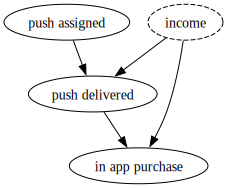

In [4]:
g = gr.Digraph()

g.edge("push assigned", "push delivered")
g.edge("push delivered", "in app purchase")
g.edge("income", "in app purchase")
g.edge("income", "push delivered")
g.node("income", style="dashed")
g

No gráfico causal, você tem a atribuição *push*. Isso é aleatório por design, então nada está causando isso. Então, você tem um nó para saber se o *push* foi entregue. Nem todos que foram designados para receber o push fizeram isso, então você tem incumprimento aqui. Mais especificamente, **existem alguns que nunca aceitam**: aqueles que não recebem o tratamento, mesmo que sejam designados para isso. Você também tem motivos para suspeitar que esse descumprimento não é simplesmente um acaso. Como as **pessoas com telefones mais antigos são as que não recebem o push**, você pode argumentar que a renda também está causando o recebimento do *push*. Quanto mais rica a pessoa, maior a probabilidade de ela ter um telefone melhor, o que, por sua vez, aumenta a probabilidade de ela receber o impulsionamento. Finalmente, você tem a **variável resultado, na compra do aplicativo**. Tenha em mente que **não conhecemos a renda**, por isso não podemos controlá-la. Com isso em mente, vamos examinar o que aconteceria se simplesmente usássemos o push atribuído como variável de tratamento e se, em vez disso, usássemos o push entregue como tratamento.

No primeiro caso, estimaríamos o efeito causal pela seguinte diferença de médias:

$$ ATE = E[Y|PushAssigned=1] - E[Y|PushAssigned=0] $$

Como já sabemos, esta é apenas uma estimativa imparcial para $E[Y_{1}]-E[Y_{0}]$ se o viés $E[Y_{0}|PushAssigned=1]-E[Y_{0}|PushAssigned=0]$ é zero. Como "Push Assigned" é aleatório, sabemos que o viés é zero.

Isso resolve tudo então? 

Não exatamente. Veja, se fizermos isso, estaremos na verdade respondendo a uma pergunta diferente daquela que pretendíamos. Estaríamos encontrando o efeito causal da atribuição do tratamento , e não do tratamento em si. 

Mas serão diferentes ou podemos extrapolar o efeito causal da atribuição do tratamento para o ATE? Em outras palavras, o efeito causal da atribuição do tratamento é uma estimativa imparcial do ATE?

Acontece que não é. Devido ao não cumprimento, o resultado daqueles designados para o tratamento será empurrado na direção do resultado daqueles designados para o controle. A não adesão inverte o tratamento involuntariamente, tornando o tratamento e o controle mais semelhantes no resultado. Não confunda isso com semelhança nas variáveis. Queremos que o tratamento e o controle sejam semelhantes nas variáveis. Isso os tornará comparáveis. O que não queremos é que tenham resultados semelhantes se realmente houver efeito do tratamento.




Para ver isso, suponhamos primeiro que temos "Always Takers". Alguns deles serão atribuídos ao controle por acaso. Mas aqueles que estão, farão o tratamento de qualquer maneira. Isso os torna essencialmente um grupo tratado que se confunde com o controle. Como resultado desta combinação, o efeito causal será mais difícil de encontrar quando houver descumprimento.


<div style="text-align:center;">
    <img src="images\always_takers.png"  alt="Imagem" style="width: 500px;"/>
</div>


Pelo mesmo raciocínio, aqueles que nunca fazem o tratamento farão com que aqueles designados para o tratamento pareçam um pouco com os não tratados, porque eles não fazem o tratamento mesmo que sejam designados para ele. Neste sentido, o efeito causal da atribuição do tratamento é tendencioso para zero porque a não adesão diminui o impacto detectável. Outra maneira de ver isso é imaginar um caso extremo. Digamos que a não conformidade seja muito alta. A atribuição do tratamento não diz nada sobre o tratamento recebido. O tratamento recebido é puramente aleatório neste caso. Na linguagem IV, isso seria dizer que temos um 1º estágio muito fraco. Usando Zpara denotar a atribuição do tratamento, teríamos que

$$ E[Y|Z=1]-E[Y|Z=0] = 0 $$

Não haveria mais ligação causal entre a atribuição do tratamento e o resultado. $Z$ seria apenas uma variável aleatória sem sentido flutuando ali.



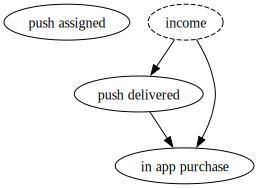

In [5]:
g = gr.Digraph()

g.node("push assigned")
g.edge("push delivered", "in app purchase")
g.edge("income", "in app purchase")
g.edge("income", "push delivered")
g.node("income", style="dashed")
g

OK, então descartamos o uso do efeito causal da atribuição como forma de estimar o efeito causal do tratamento. Então, que tal usar apenas o tratamento recebido?

$$ ATE = E[Y|PushDelivered=1] - E[Y|PushDelivered=0] $$

Mais uma vez, precisamos pensar se isso é tendencioso ou não, ou se $ E[Y_{0}|PushDelivered=1]=E[Y_{0}|PushDelivered=0]$.  Apenas olhando para o gráfico causal acima, sabemos que não é o caso. 

Temos aquele fator de confusão (a renda) e isso bagunça a identificação causal. Como dissemos anteriormente, sabemos que a falha na entrega push, no nosso caso, é causada por clientes que possuem telefones mais antigos. O que significa que provavelmente temos $ E[Y_{0}|PushDelivered=0] < E[Y_{0}|PushDelivered=1]$. Achamos que este é o caso porque os clientes com menos dinheiro têm telefones mais antigos, o que levará a "$PushDelivered=0$" e também um menor potencial na compra de aplicativos $Y_{0}$.

**Não podemos usar o tratamento atribuído nem o tratamento recebido para estimar nosso ATE**. Mas felizmente sabemos o que podemos usar: **Variáveis ​​Instrumentais**. Aqui, o tratamento Atribuído é o instrumento perfeito para o tratamento. É praticamente aleatório e só causa compras no aplicativo em virtude do tratamento.

#### Formalizando o Local Average Treatment Effect (LATE)

Relaxamos a suposição de que os efeitos do tratamento são os mesmos para todas as unidades. É aqui que a notação de resultados potenciais se torna útil. Em vez disso, permitiremos que cada unidade tenha uma resposta única ao tratamento, ou

$$ Y_{i}^{1} - Y_{i}^{0} = \delta_{i} $$

Observe que o parâmetro de efeito do tratamento agora difere de acordo com cada indivíduo $i$. Chamamos isso de **efeitos de tratamento heterogêneos**. Uma vez introduzidos efeitos de tratamento heterogêneos, introduzimos uma distinção entre a validade interna de um estudo e a sua validade externa. A questão é que, sob efeitos de tratamento homogêneos, não há tensão entre validade externa e interna porque todos têm o mesmo efeito de tratamento. Mas sob efeitos de tratamento heterogêneos, há uma enorme tensão; a tensão é tão grande, na verdade, que pode até minar o significado da relevância do efeito causal estimado, apesar de um desenho de IV válido!

As principais questões que temos agora são: 
* (1) o que o IV está estimando quando temos efeitos de tratamento heterogêneos e 
* (2) sob quais suposições o IV identificará um efeito causal com efeitos de tratamento heterogêneos? 

Agora temos dois argumentos $D$ e $Z$. E $Y$ é uma função dos dois, $Y_{i}(T_{i}=0, Z_{i}=1)$ que é representado por $Y_{i}(0,1)$, por exemplo.

Os resultados potenciais tal como temos usado o termo, referem-se à variável $Y$, mas agora temos uma nova variável potencial – **o estado de tratamento potencial** (em oposição ao estado de tratamento observado). Aqui estão as características:

$$ T_{i}^{1} = \text{status de i quando} Z_{i}=1 $$
$$ T_{i}^{0} = \text{status de i quando} Z_{i}=0 $$

E o **status de tratamento observado** é baseado em equações de mudança de status de tratamento:

$$ T_{i} = T_{i}^{0} + (T_{i}^{1} - T_{i}^{0})Z_{i} = \pi_{0} + \pi_{1} Z_{i} + \phi_{i}$$

onde $\pi_{0i} = E[T_{i}^{0}]$, e $\pi_{1i} = (T_{i}^{1} - T_{i}^{0})$ é o efeito causal heterogêneo do IV sobre $T_{i}$, e $E[\pi_{1i}]$ é o efeito causal médio de $Z_{i}$ sobre $T_{i}$.

Suposições necessárias para identificação causal sob efeitos de tratamento heterogêneos:

* 1. **SUTVA**: Suposição de valor de tratamento unitário estável (SUTVA) que afirma que os resultados potenciais para cada pessoa
não estão relacionados ao status de tratamento de outros indivíduos. 
* 2. **Suposição de Independência**: $T_{0i}, T_{1i} \perp Z_{i}$ e $Y_{i}(T_{1i},1), Y_{i}(T_{0i},0) \perp Z_{i}$. Isso significa que o instrumento é atribuído aleatoriamente. Em outras palavras, Z, o instrumento, não está correlacionado com os tratamentos potenciais, o que equivale a dizer que pessoas em diferentes grupos de instrumentos são comparáveis. A suposição de independência também é às vezes chamada de suposição de “atribuição tão boa quanto aleatória”. Em última análise, a independência nada mais é do que assumir que o próprio instrumento é aleatório.
* 3. **Restrição de Exclusão**: $Y_{i}(1,0) = Y_{i}(1,1) = Y_{i1}$ e $Y_{i}(0,0)=Y_{i}(0,1)=Y_{i0}$. Diz que se olharmos para o resultado potencial para os tratados, é o mesmo para ambos os grupos de instrumentos. Em outras palavras, o instrumento não afeta o resultado potencial, o que equivale a dizer que o instrumento afeta apenas o resultado através do tratamento.
* 4. **Primeiro Estágio**: $E[T_{1i}-T_{0i}] \neq 0$. Projetos IV exigem que $Z$ seja correlacionado com a variável endógena tal que $E[T_{i}^{1}-T_{i}^{0}] \neq 0$. Está dizendo que o resultado potencial da 1ª etapa, ou seja, o tratamento potencial, NÃO é o mesmo. Outra forma de dizer isto é que o instrumento afeta o tratamento.
* 5. **Monotonicidade**: $T_{i1}>T_{i0}$. Está dizendo que se todos tivessem o instrumento ligado, o nível de tratamento seria maior do que se todos tivessem o tratamento desligado.

No IV moderno, vemos o instrumento como iniciando uma cadeia causal: Z causa T que causa Y. Neste contexto, a restrição de exclusão significa que Z não causa Y, a não ser pelo seu efeito em T. O primeiro estágio é agora visto como o efeito causal de Z em T. Também reescrevemos os resultados potenciais com uma notação de indexação dupla, onde o primeiro índice denota o contrafactual para o instrumento e o segundo índice, para o tratamento

$$  \text{Potetial Outcome} = \left\{\begin{matrix}Y_{i}(1,1) se T_{i}=1 e Z_{i}=1
 \\ Y_{i}(1,0) \text{se} T_{i}=1 \text{e} Z_{i}=0
 \\ Y_{i}(0,0) \text{se} T_{i}=0 \text{e} Z_{i}=0
 \\ Y_{i}(0,1) \text{se} T_{i}=0 \text{e} Z_{i}=1
\end{matrix}\right.
$$

Num certo sentido, o tratamento torna-se o resultado, pelo menos no primeiro estágio. Isso significa que também podemos escrevê-lo com notação de resultado potencial:

$$  \text{Potetial Treatment} = \left\{\begin{matrix} T_{0} se Z_{i}=0
 \\ T_{1} se Z_{i}=1
 \end{matrix}\right.
$$



Agora, vamos revisar o estimador de Wald para obter mais intuição sobre IV:

$$ ATE = \frac{E[Y|Z=1]-E[Y|Z=0]}{{E[T|Z=1]-E[T|Z=0]}} $$

Utilizando a restrição de exclusão, podemos reescrever Y em termos de um resultado potencial como este.

$$ E[Y_{i}|Z_{i}=1]=E[Y_{i0} + T_{i1}(Y_{i1}-Y_{i0}|Z=1)] $$

Usando a independência, podemos eliminar o condicionamento de Z.

$$ E[Y_{i}|Z_{i}=1]=E[Y_{i0} + T_{i1}(Y_{i1}-Y_{i0})] $$

Com um argumento semelhante, obtemos que

$$ E[Y_{i}|Z_{i}=0]=E[Y_{i0} + T_{i0}(Y_{i1}-Y_{i0})] $$

Podemos agora reescrever o numerador do estimador de Wald assim

$$ E[Y|Z=1] - E[Y|Z=0] = E[(Y_{i1}-Y_{i0})(T_{i1}- T_{i0})] $$

Usando a monotonicidade, sabemos que $T_{i1} - T_{i0}$ é 0 ou 1, então

$$ E[(Y_{i1}-Y_{i0})(T_{i1}- T_{i0})] = E[(Y_{i1}-Y_{i0})|T_{i1} > T_{i0}]P(T_{i1} > T_{i0}) $$

Usando um argumento semelhante para lidar com o denominador, obtemos que

$$ E[T|Z=1] - E[T|Z=0] = E[(T_{i1}-T_{i0})] =  P(T_{i1} > T_{i0}) $$


Tudo isso nos permite olhar para o estimador de Wald assim:


$$ ATE = \frac{E[(Y_{i1}-Y_{i0})|T_{i1} > T_{i0}]P(T_{i1}>T_{i0})}{P(T_{i1} > T_{i0})} = E[(Y_{i1}-Y_{i0})|T_{i1}>T_{i0}]$$

Ou seja, o ATE estimado por IV é o ATE na subpopulação onde $T_{i1}>T_{i0}$. E se você pensar em *compliance*, que população é essa? Esta é a população onde aqueles que ligam o instrumento têm um nível de tratamento mais elevado do que se estivessem com o instrumento desligado. Em outras palavras, esta é a população cumpridora. Só para que possamos lembrar,

* Cumpridores significa que $T_{i1}>T_{i0}$.
* Nunca tomadores significa que $T_{i1}=T_{i0}=0$.
* Sempre tomadores significa que $T_{i1}=T_{i0}=1$.

A conclusão disto é que a IV não diz nada sobre o efeito em quem nunca toma, sempre toma ou desafia, porque o tratamento permanece inalterado para eles! **IV só encontra o efeito do tratamento para os aderentes**.

#### Aplicação no Python

Vamos ver como tudo isso acontece no estudo de caso em que tentamos estimar o efeito de um push na compra no aplicativo. O gráfico causal é aquele que descrevemos acima, então não vou repeti-lo aqui. Os dados que temos estão tanto no push atribuído, o instrumento randomizado, quanto no push entregue, a variável de tratamento.

In [6]:
# Pacotes
import linearmodels.iv.model as lm

In [7]:
# DataFrame
data = pd.read_csv("https://github.com/Daniel-Uhr/data/raw/main/app_engagement_push.csv")
data.head()

,in_app_purchase,push_assigned,push_delivered
0,47,1,1
1,43,1,0
2,51,1,1
3,49,0,0
4,79,0,0


Primeiro, vamos executar o OLS para ver o que isso nos daria.

In [30]:
ols = lm.IV2SLS.from_formula("in_app_purchase ~ 1 + push_assigned + push_delivered", data).fit()
ols.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
Intercept,69.292,0.3624,191.22,0.0000,68.581,70.002
push_assigned,-17.441,0.5702,-30.590,0.0000,-18.559,-16.324
push_delivered,27.600,0.6124,45.069,0.0000,26.399,28.800


A OLS está dizendo que o efeito do tratamento é de RS 27,60, ou seja, o Push aumenta a compra no app em 27,6 reais. No entanto, temos razões para acreditar que esta é uma estimativa tendenciosa. Sabemos que os telefones mais antigos estão tendo problemas para receber o push, então, provavelmente, os clientes mais ricos, com telefones mais novos, são os que cumprem. Como quem recebe o tratamento também tem mais dinheiro, acreditamos que esse viés é positivo e o verdadeiro impacto do impulso é menor. Em outras palavras, provavelmente temos $E[Y_{0}|T=0 < E[Y_{0}|T=1]$.

Agora, vamos tentar estimar esse efeito com Variáveis ​​Instrumentais. Primeiro, vamos executar o primeiro estágio.

In [31]:
first_stage = lm.IV2SLS.from_formula("push_delivered ~ 1 + push_assigned", data).fit()
first_stage.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
Intercept,2.963e-18,,,,,
push_assigned,0.7176,0.0064,112.07,0.0000,0.7050,0.7301


Parece que temos uma primeira etapa forte. Aqueles que são designados para receber o impulso conseguem-no 71,8% das vezes. Isso significa que temos algo em torno de 28% dos que nunca tomam. Também temos fortes razões para acreditar que nem sempre há tomadores, uma vez que o parâmetro de interceptação é estimado como zero. Isso significa que ninguém recebe o push se não estiver atribuído a ele. Dado o desenho do nosso experimento, isso é esperado.

Vamos agora executar o formulário reduzido:

In [25]:
reduced_form = lm.IV2SLS.from_formula("in_app_purchase ~ 1 + push_assigned", data).fit()
reduced_form.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
Intercept,69.292,0.3624,191.22,0.0000,68.581,70.002
push_assigned,2.3636,0.5209,4.5376,0.0000,1.3427,3.3845


A forma reduzida mostra que o efeito causal da atribuição do tratamento é 2,36. Isso significa que designar alguém para receber o push aumenta a compra no aplicativo em 2,36 reais.

Se dividirmos a forma reduzida pelo primeiro estágio, dimensionamos o efeito do instrumento pelas unidades do tratamento, obtemos $2.3636/0.7176=3.29$. Executando o 2SLS, obtemos essas mesmas estimativas, com o bônus de erros padrão corretos.

In [26]:
iv = lm.IV2SLS.from_formula("in_app_purchase ~ 1 + [push_delivered ~ push_assigned]", data).fit()
iv.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
Intercept,69.292,0.3624,191.22,0.0000,68.581,70.002
push_delivered,3.2938,0.7165,4.5974,0.0000,1.8896,4.6981


Isso mostra que o resultado com 2SLS é bem inferior ao que obtivemos com OLS: 3,29 contra 27,60. Isto faz sentido, uma vez que o efeito causal estimado com MQO é positivamente enviesado. Também precisamos nos lembrar do LATE. 3,29 é o efeito causal médio sobre os cumpridores. Infelizmente, não podemos dizer nada sobre aqueles que nunca tomam. Isto significa que estamos a estimar o efeito sobre o segmento mais rico da população que possui telefones mais novos.

#### Considerações

Aqui vimos uma visão mais moderna das variáveis ​​instrumentais. Vimos como a VI pode ser vista como uma cadeia causal onde o instrumento causa o tratamento que causa o resultado. Nessa visão, demos uma olhada na conformidade para entender o ATE na estimativa IV e descobrimos que era o LATE nos cumpridores.